# Statistical Mechanics in Einstein solids and Systems in Contact

In this activity, you will build a statistical model of two interacting "Einstein" solids (let's call them "solid A" and "solid B") and show that this system has many of the same qualitative attributes that we associate with **thermodynamic equilibrium** and furthermore that the **statistical multiplicity** has many of the same attributes that we normally associate with **classical entropy**.

The Einstein model of a Solid is an extension of the "ball-and-spring model" of a solid in which atoms are represented as spheres with spring-like chemical bonds holding them together in the x, y, and z directions:

https://www.glowscript.org/#/user/matterandinteractions/folder/matterandinteractions/program/04-ball-and-spring-model

The Einstein model further specifies that the energy content of the ball-and-spring model is quantized.

https://www.glowscript.org/#/user/matterandinteractions/folder/matterandinteractions/program/12-wells-oscillator

You are encouraged to use your two-state computational model as a framework to model this this new system, but you shouldn't have much difficulty building this model from scratch. Ultimately, your program should output a plot of the number of **microstates** for each possible **macrostate**. The broad structure for your program should be:

* Define a set of **macro-states**; Imagine starting with all of the quanta in solid A and then one-by-one shifting individual quanta into solid B. 
* Calculate the multiplicity associated with a single macrostate
* Iterate this calculation over each macrostate, and
* Output and plot the results.

This model differs from the 2-state system in a few key ways:

* The combinatoric formula for Einstein solids is different than the formula for a 2-state system
* You’ll have to compute the combined multiplicity for two objects instead of for just one
* You’ll have to make use of either 
 1. an iterative loop or
 2. more sophisticated techniques like vectorization (including using methods); your choice!
 
At this point, your model should serve as a plausibility argument: it should reproduce some of the features we observe from classical thermodynamics. In the following activity, you will use your model to generate *testable* predictions of heat capacity. 

In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

Let's first reproduce Fig. 2.4. For an Einstein solid, the multiplicity (number of states) is given by
$$\Omega(N,q) = \frac{(q+N-1)!}{q!(N-1)!}$$
where "$N$" is the number of oscillators and "$q$" is the number of energy quanta.

We can set up system A with three oscillators $N_A=3$ and $q_A=6$ and system B with three oscillators $N_B=3$ and $q_B=0$.

In [2]:
NA = 3
qA = 6
NB = 3
qB = 0

omegaA = factorial(qA+NA-1) / (factorial(qA) * factorial(NA-1))
omegaB = factorial(qB+NB-1) / (factorial(qB, exact=True) * factorial(NB-1))
print(omegaA, omegaB, omegaA*omegaB)

28.0 1.0 28.0


Obviously, we don't want to manually calculate each value of $q$ being passed to each solid. See if you can use what you learned in the two-state multiplicity activity to calculate the lists of $\Omega_A, \Omega_B,$ and $\Omega_{total}$.

We would like to calculate the multiplicity of the combined system as a function of the number of quanta in solid A. 

**Write an algorithm that will do the following**:
* Define constants `q, NA, NB`.
* Generate a list (or array) of every possible value of $q_\text{A}$. (How many elements should be in this list/array?)
* Do the same for every value of $q_\text{B}$ (don't forget that $q_\text{B} = q_\text{total} - q_\text{A}$).
* Calculate the multiplicity of microstates in solid A for *each* value of $q_\text{A}$.  Do this again for solid B. Both of these should be in the form of a list or array.
* Calculate the combined multiplicity for each distribution of energy. Your algorithm should output this as a list/array

To help you get started, the code we used for the two-state system is shown below. As you see above, we have four parameters $q_A, N_A, q_B, N_B$ for the solid compared to two $n_H, N$ for the two-state. You can modify the code below to do what is described here for the solid. You do not need to edit the plotting section as long as you use names `qA, qB, NA, NB, omegaA, omegaB, omega_tot`.

In [ ]:
n1 = np.arange(0, 2, 1)#arange is exclusive of the upper bound
N1 = 1
omega1 = factorial(N1)/(factorial(n1)*factorial(N1-n1))


plt.bar(qA, omega_tot)
plt.xlabel(r'$q_A$')
plt.ylabel(r'$\Omega_{total}=\Omega_A\cdot\Omega_B$')
plt.show()

**!!! Before moving on, make sure that your code is reproducing the same numbers. The system is small enough that you can calculate them.**

**Create a plot of the combined multiplicity, $\Omega_\text{total}$, vs. $q_A$**

Use the ``plt.bar`` function to create a bar graph. (for documentation, type ``help(plt.bar)``). Don't forget that this function requires you to input arrays of equal length (or equal length slices of larger arrays) so pay attention to the size of your $\Omega_\text{total}$ and $q_A$ arrays. Be sure to include a title, axis labels, etc. 

---
## Adapting your Model
---

Once you are able to reproduce the results you calculated algebraically and produce a nice plot like Fig. 2.4, you should be able to easily alter your program to model other situations.

**Adapt your code to do the following:**
* Model two Einstein solids in contact; one with 30 oscillators and one with 50, sharing 80 quanta between them.
* Insert code print out the macrostate (or value of $q_\text{A}$) that has the highest multiplicity and print out this multiplicity.
* Insert code to print out the total number of microstates. 

Your print statement will could be made fancy with code like the following.

```python
# np.argmax(W_total) returns the index of the largest value. This same index identifies the specific values of qA and qB
print('The macrostate with the largest multiplicity corresponds to qA={0} and qB={1}. This multiplicity is {2}'.format(qA[np.argmax(omega_total)], qB[np.argmax(omega_total)], omega_total.max()))
```

### Larger Systems
The `factorial` function from `scipy.special` breaks at around 70 oscillators. Larger systems can be calculated using the `math` library's `factorial`. However, this function does not work on lists (arrays). Instead a loop is necessary to calculate each element in a list. The code below will calculate a system of $N_A = 100$, $N_B=200$, and $q=200$. This will be useful for your homework.

In [6]:
from math import factorial
import pandas as pd

In [7]:
q = 200
qA = np.arange(0, q+1, 1)

NA = 100
NB = 200

#create empty lists for looping
omegaA = np.zeros(q+1)
omegaB = np.zeros(q+1)
omega_tot = np.zeros(q+1)

#loop through the lists
ind = 0
for i in qA:
  omegaA[ind] = factorial(i+NA-1)/(factorial(i)*factorial(NA-1))
  omegaB[ind] = factorial(q-i+NB-1)/(factorial(q-i)*factorial(NB-1))
  ind += 1

omega_tot = omegaA * omegaB

#Make a pretty table using pandas
header = ["qA", "Omega A", "qB", "Omega B", "Omega Total"]
df = pd.DataFrame(columns=header)
df.astype('float64').dtypes
df['qA'] = qA
df['Omega A'] = omegaA
df['qB'] = qB
df['Omega B'] = omegaB
df['Omega Total'] = omega_tot 

display(df)

,qA,Omega A,qB,Omega B,Omega Total
0,0,1.000000e+00,0,5.147625e+118,5.147625e+118
1,1,1.000000e+02,0,2.580263e+118,2.580263e+120
2,2,5.050000e+03,0,1.290132e+118,6.515164e+121
3,3,1.717000e+05,0,6.434409e+117,1.104788e+123
4,4,4.421275e+06,0,3.200956e+117,1.415231e+124
...,...,...,...,...,...
196,196,2.747061e+80,0,6.868505e+07,1.886821e+88
197,197,4.127564e+80,0,1.353400e+06,5.586246e+86
198,198,6.191347e+80,0,2.010000e+04,1.244461e+85
199,199,9.271464e+80,0,2.000000e+02,1.854293e+83


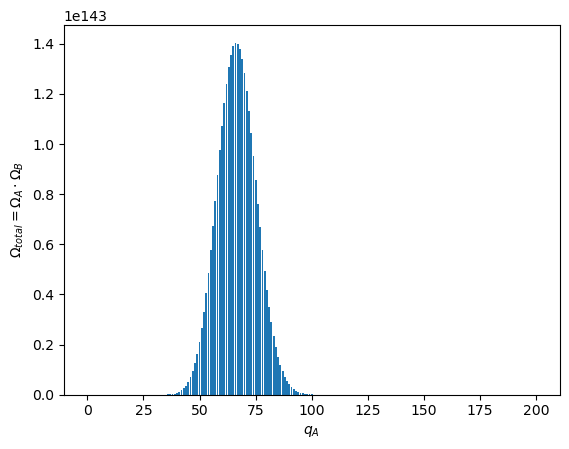

In [8]:
plt.bar(qA, omega_tot)
plt.xlabel(r'$q_A$')
plt.ylabel(r'$\Omega_{total}=\Omega_A\cdot\Omega_B$')
plt.show()

### Answer the following questions:

* In this new situation, the macrostate with the highest multiplicity no longer features a 50-50 division of energy between the two solids; To what does this particular split seem to correspond? Explain whether or not it still makes sense to associate this uneven division of energy with macroscopic equilibrium. Can you use this to come up with a plausible description for what "statistical equilibrium" is in terms of energy distributions?

* You might have balked at the artificiality of modeling single atoms as solids and, even worse, modeling those atoms as if they can oscillate against neighboring atoms. But even the $N=30$ and $N=50$ solids from the last exercise have the problem that a large fraction of the atoms are edge-cases that are missing some neighboring bonds. 

Argue for why, in the limit of macroscopic materials ($N\approx 10^{23}$), these edge-cases produce a negligible difference from the overall behavior predicted by the Einstein-Solid model. Can you brainstorm other limitations of this model that we might want to take into account in more sophisticated models? 

### Want a challenge?

* The plot from your original model ($N_A = N_B = 3$; $q_\text{total} = 6$) was fairly broad compared to the new plot suggesting the possibility of larger fluctuations about the maximal value. Estimate the standard deviation for $q_A$ as a fraction of $q_\text{total}$ for this new situation and then use the plot from the original test situation and estimate the standard deviation for that too. One way to do this is to estimate the half-width at half the maximum height as a fraction of the total range but you can also calculate the standard deviations with a bit of extra code:
$$
\begin{align}
\text{stdev}(q) &= \sqrt{\langle q^2\rangle - \langle q\rangle^2}\\
\langle q\rangle &= \sum_{q=0}^{q_\text{total}}q\Omega_\text{total}\\
\langle q^2\rangle &= \sum_{q=0}^{q_\text{total}}q^2\Omega_\text{total}
\end{align}
$$

Qualitatively, what effect does increasing the values of $q_\text{total}$, $N_A$, and $N_B$ have on the standard deviation as a percent of the total range? What impact do you think that this has on fluctuations about the maximal value? What do you think would happen to the spread and to the system's fluctuations if $N_A$, $N_B$, and $q_\text{total}$ were on the order of $10^{23}$ (but don't actually put these large numbers into your program)? What do you think this says about the odds of finding a system far from equilibrium?